# Desafios da aula 02 do Segundo modulo do Segundo bootcamp de data science da Alura

## Desafio 01

**Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.**


In [10]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

pd.options.display.float_format = "{:.2f}".format
 
def populacao_gastos_cleaning(url_tabnet):
  url_pop = "https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1"

  res = requests.get(url_pop).text
  wikitest = StringIO(res)
  populacao = pd.read_html(wikitest)[0]
  populacao['populacao'] = populacao["População"].str.replace(" ", "").astype(int)
  populacao["uf"] = populacao["Unidade federativa"]
  populacao = populacao[["populacao", "uf"]].set_index("uf")

  dados = pd.read_csv(url_tabnet,
                encoding="ISO-8859-1", 
                skiprows = 3, sep=";", skipfooter=12,
                thousands=".", decimal=",")

  colunas_usaveis = dados.mean().index.tolist()
  colunas_usaveis.insert(0, "Unidade da Federação")
  usaveis = dados[colunas_usaveis]
  usaveis = usaveis.set_index("Unidade da Federação")
  ordenado_por_total = usaveis.sort_values("Total", ascending=False)
  ordenado_por_total = ordenado_por_total / 1000000
  ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
  mes_mais_recente = ordenado_por_total.columns[-1]
  gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
  gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
  gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)

  return populacao, gastos_e_populacao_recente 

<ipython-input-10-ebbf54821fa7>:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv(url_tabnet,


<AxesSubplot:title={'center':'Gasto por habitante por UF'}, xlabel='uf'>

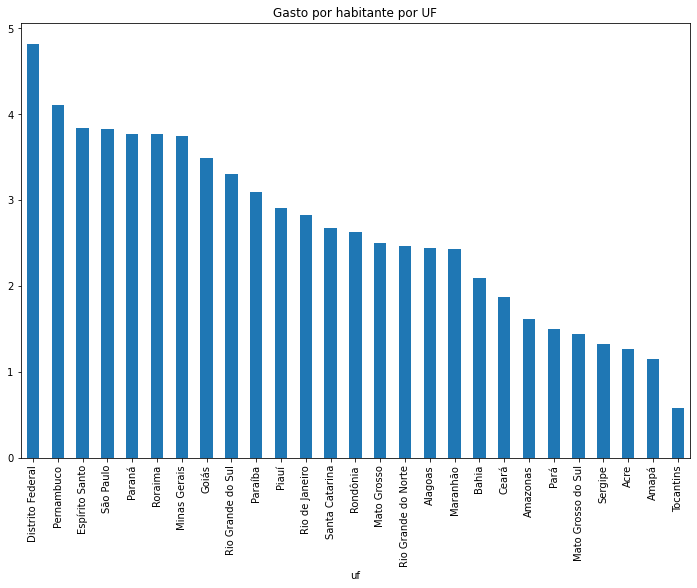

In [39]:
url_tabnet = "https://github.com/CidSantiago/BootcampAluraDesafios/raw/main/dados/A170039189_28_143_208.csv"

populacao, gastos_e_populacao_recente = populacao_gastos_cleaning(url_tabnet)

gastos_e_populacao_recente["gastos"] = gastos_e_populacao_recente["2021/Mar"] * 1000000
gastos_e_populacao_recente["gasto_por_habitante"] = gastos_e_populacao_recente["gastos"] / gastos_e_populacao_recente["populacao"]
gastos_e_populacao_recente["gasto_por_habitante"].sort_values(ascending=False).plot(kind='bar', title='Gasto por habitante por UF',figsize=(12,8))


<AxesSubplot:title={'center':'Gasto por habitante por UF ordenado por população'}, xlabel='uf'>

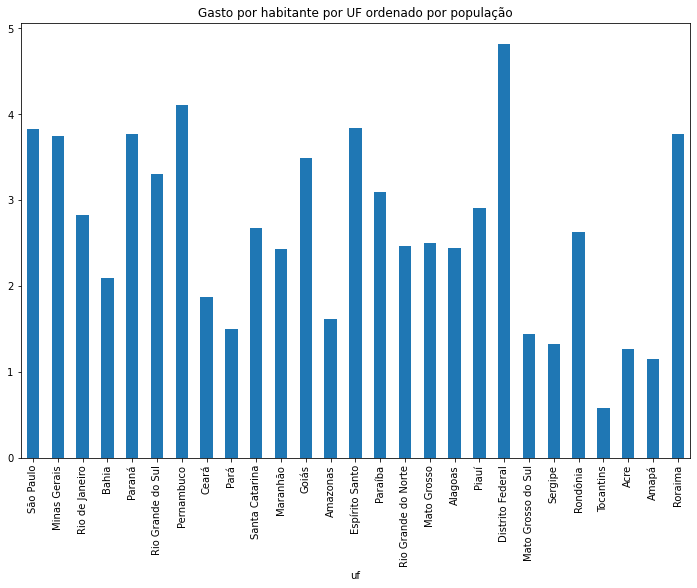

In [32]:
gastos_e_populacao_recente.sort_values('populacao', ascending=False)
gastos_e_populacao_recente["gasto_por_habitante"].plot(kind='bar', title='Gasto por habitante por UF ordenado por população',figsize=(12,8))


## Desafio 02 (Super Desafio Gui)

**Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.**

Primeiramente, vamos fazer os gráficos da aula:

<AxesSubplot:title={'center':'Gasto total por população em milhões de cada UF'}, xlabel='populacao', ylabel='gastos'>

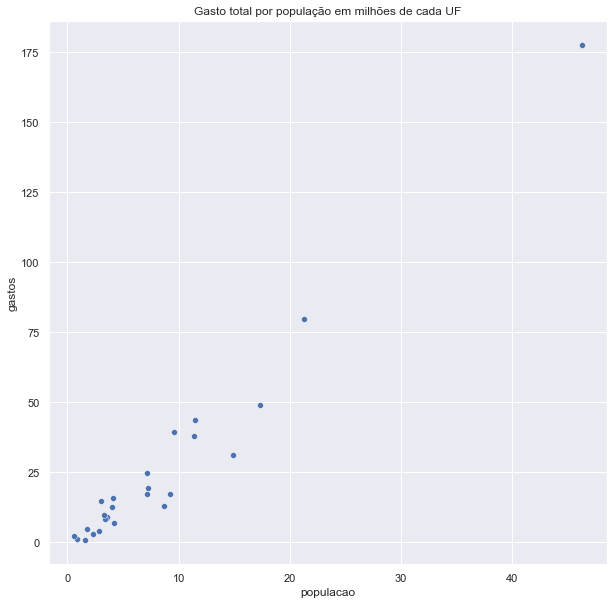

In [60]:
import seaborn as sns

sns.set()
plt.figure(figsize=(10,10))
plt.title('Gasto total por população em milhões de cada UF')
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos")

<AxesSubplot:title={'center':'Gasto per capita por população de cada UF'}, xlabel='populacao', ylabel='gasto_por_habitante'>

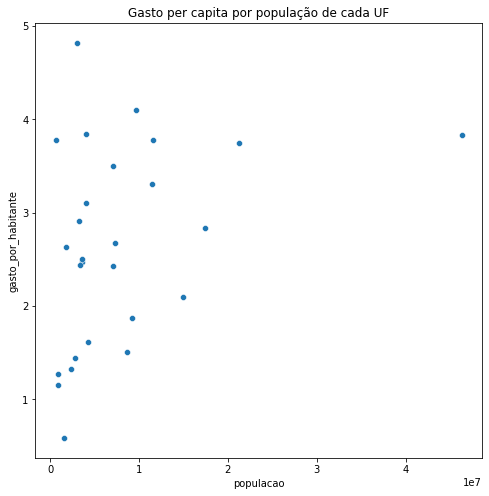

In [37]:
plt.figure(figsize=(10,10))
plt.title('Gasto per capita por população de cada UF')
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante")

Vale ressaltar que já estamos fazendo para outro mes dos que são utilizados na aula. Na aula, é utilizado o mês **julho de 2020**, enquanto o mês mais recente para o nosso caso é **março de 2021**. Podemos notar que o padrão é muito parecido com o exibido nas aulas. Vamos fazer o mesmo para um mês antes e vê se mantêm-se o mesmo padrão.

In [44]:
def populacao_gastos_cleaning_date(url_tabnet, date):
  url_pop = "https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1"

  res = requests.get(url_pop).text
  wikitest = StringIO(res)
  populacao = pd.read_html(wikitest)[0]
  populacao['populacao'] = populacao["População"].str.replace(" ", "").astype(int)
  populacao["uf"] = populacao["Unidade federativa"]
  populacao = populacao[["populacao", "uf"]].set_index("uf")

  dados = pd.read_csv(url_tabnet,
                encoding="ISO-8859-1", 
                skiprows = 3, sep=";", skipfooter=12,
                thousands=".", decimal=",")

  colunas_usaveis = dados.mean().index.tolist()
  colunas_usaveis.insert(0, "Unidade da Federação")
  usaveis = dados[colunas_usaveis]
  usaveis = usaveis.set_index("Unidade da Federação")
  ordenado_por_total = usaveis.sort_values("Total", ascending=False)
  ordenado_por_total = ordenado_por_total / 1000000
  ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
  gastos_do_mais_recente = ordenado_por_total[date]
  gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
  gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)

  return populacao, gastos_e_populacao_recente 

_,gastos_e_populaçao_fev_2021 = populacao_gastos_cleaning_date(url_tabnet, '2021/Fev')
gastos_e_populaçao_fev_2021["gastos"] = gastos_e_populaçao_fev_2021["2021/Fev"] * 1000000
gastos_e_populaçao_fev_2021["gasto_por_habitante"] = gastos_e_populaçao_fev_2021["gastos"] / gastos_e_populaçao_fev_2021["populacao"]
gastos_e_populaçao_fev_2021

<ipython-input-44-147e978ad449>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv(url_tabnet,


,populacao,2021/Fev,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333,268.19,268193064.06,5.79
Minas Gerais,21292666,119.88,119877417.15,5.63
Rio de Janeiro,17366189,60.87,60873103.08,3.51
Bahia,14930634,55.54,55544579.04,3.72
Paraná,11516840,83.13,83130175.37,7.22
Rio Grande do Sul,11422973,84.40,84404640.00,7.39
Pernambuco,9616621,62.26,62259409.32,6.47
Ceará,9187103,30.19,30186951.00,3.29
Pará,8690745,23.34,23343222.94,2.69


<AxesSubplot:title={'center':'Gasto total por população em milhões de cada UF'}, xlabel='populacao', ylabel='gastos'>

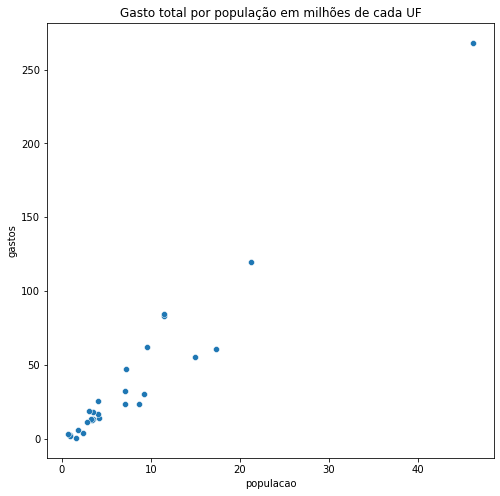

In [45]:
plt.figure(figsize=(10,10))
plt.title('Gasto total por população em milhões de cada UF')
sns.scatterplot(data=gastos_e_populaçao_fev_2021 / 1000000, x="populacao", y="gastos")

<AxesSubplot:title={'center':'Gasto per capita por população de cada UF'}, xlabel='populacao', ylabel='gasto_por_habitante'>

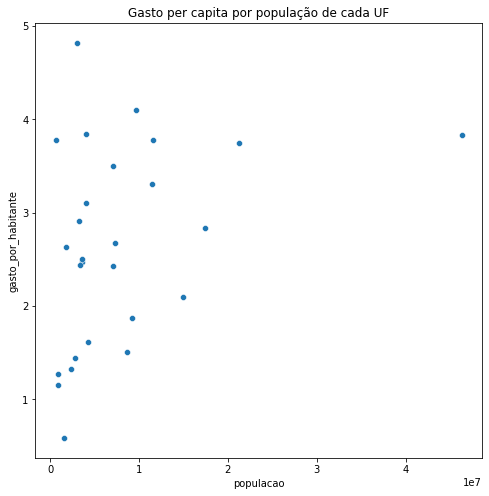

In [46]:
plt.figure(figsize=(10,10))
plt.title('Gasto per capita por população de cada UF')
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante")

Visualmente, não conseguimos identificar diferenças notáveis. A tendencia de crescimento linear entre gasto total e população se mantém, como era esperado, e a relação entre gasto per capita e população se aproxima de uma curva logarítmica talvez, mas não é claro. No proximo desafio, as difenças entre os meses ficarão mais claras.

## Desafio 03 (Super Desafio Thiago)

**Plotar no mesmos gráficos do final da aula o mês anterior e o mês corrente, analisar e compartilhar suas hipóteses.**

Vamos agorar plotar no mesmo gráfico os nossos dois dataframes

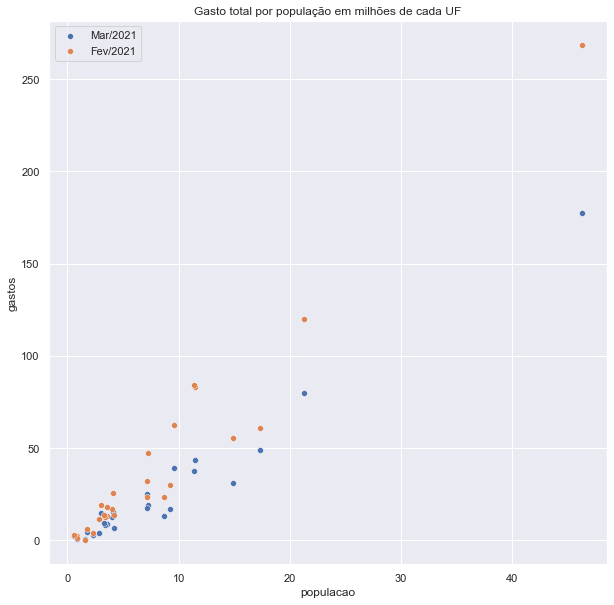

In [63]:
sns.set()
plt.figure(figsize=(10,10))
plt.title('Gasto total por população em milhões de cada UF')
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos", label='Mar/2021')
sns.scatterplot(data=gastos_e_populaçao_fev_2021 / 1000000, x="populacao", y="gastos", label='Fev/2021')
plt.legend(loc='upper left')
plt.show()

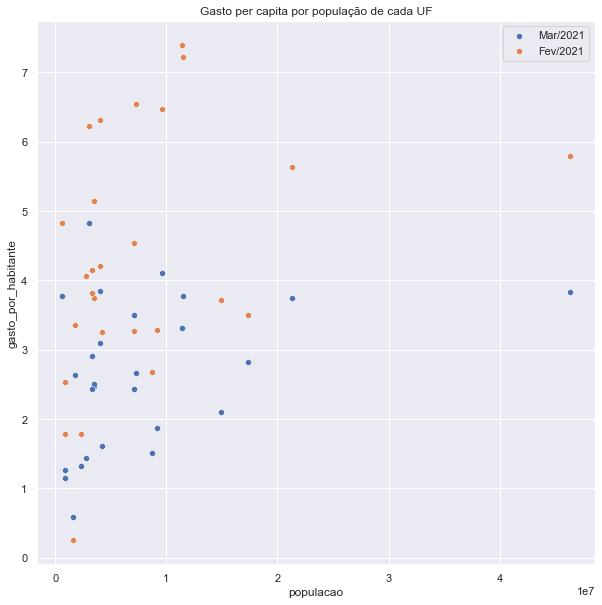

In [65]:
plt.figure(figsize=(10,10))
plt.title('Gasto per capita por população de cada UF')
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante", label='Mar/2021')
sns.scatterplot(data=gastos_e_populaçao_fev_2021, x="populacao", y="gasto_por_habitante", label='Fev/2021')
plt.legend()
plt.show()

Podemos perceber que as tendencias se mantém, sendo a variância (dispersão) no segundo gráfico muito maior que no primeiro. Isso pode indicar que os dados são menos padronizados no segundo caso, sendo mais dificil de definir tendencias quanto a isso, enquanto no primeiro a tarefa de 'definir tendencias' parece mais simples

## Desafio 04 (Próximo Vídeo)

**Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.**

Quando analisado os gráficos a conclusão de que se trata de um problema de regressão linear no primeiro caso se tornou mais claro. Ainda não foi falado no curso sobre, mas nada mais é que um modelo simples de predição, onde podemos traçar uma reta e prever os valores por ela.

Já na segunda relação, entre gasto per capita e população, não existe uma tendência notável e de simples visualização. Visualmente, podemos tentar encaixar alguma tendencia logaritmica, mas não é claro o suficiente para dizer que isso resolveria o nosso problema.